In [1]:
# Author       : Praveen Kumar N
# E-Mail       : praveenkumar.npc9@gmail.com
# Contact      : +91-9738407481
# Linear Regression by using numpy package

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(225)
data_x = np.linspace(-10.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
#data_y = 29*data_x  + 20* np.random.randn(100, 1)
data_x /= np.max(data_x) #scaling
data_x

array([[-1.        ],
       [-0.97979798],
       [-0.95959596],
       [-0.93939394],
       [-0.91919192],
       [-0.8989899 ],
       [-0.87878788],
       [-0.85858586],
       [-0.83838384],
       [-0.81818182],
       [-0.7979798 ],
       [-0.77777778],
       [-0.75757576],
       [-0.73737374],
       [-0.71717172],
       [-0.6969697 ],
       [-0.67676768],
       [-0.65656566],
       [-0.63636364],
       [-0.61616162],
       [-0.5959596 ],
       [-0.57575758],
       [-0.55555556],
       [-0.53535354],
       [-0.51515152],
       [-0.49494949],
       [-0.47474747],
       [-0.45454545],
       [-0.43434343],
       [-0.41414141],
       [-0.39393939],
       [-0.37373737],
       [-0.35353535],
       [-0.33333333],
       [-0.31313131],
       [-0.29292929],
       [-0.27272727],
       [-0.25252525],
       [-0.23232323],
       [-0.21212121],
       [-0.19191919],
       [-0.17171717],
       [-0.15151515],
       [-0.13131313],
       [-0.11111111],
       [-0

In [4]:
data_x = np.hstack((np.ones_like(data_x), data_x))
data_x

array([[ 1.        , -1.        ],
       [ 1.        , -0.97979798],
       [ 1.        , -0.95959596],
       [ 1.        , -0.93939394],
       [ 1.        , -0.91919192],
       [ 1.        , -0.8989899 ],
       [ 1.        , -0.87878788],
       [ 1.        , -0.85858586],
       [ 1.        , -0.83838384],
       [ 1.        , -0.81818182],
       [ 1.        , -0.7979798 ],
       [ 1.        , -0.77777778],
       [ 1.        , -0.75757576],
       [ 1.        , -0.73737374],
       [ 1.        , -0.71717172],
       [ 1.        , -0.6969697 ],
       [ 1.        , -0.67676768],
       [ 1.        , -0.65656566],
       [ 1.        , -0.63636364],
       [ 1.        , -0.61616162],
       [ 1.        , -0.5959596 ],
       [ 1.        , -0.57575758],
       [ 1.        , -0.55555556],
       [ 1.        , -0.53535354],
       [ 1.        , -0.51515152],
       [ 1.        , -0.49494949],
       [ 1.        , -0.47474747],
       [ 1.        , -0.45454545],
       [ 1.        ,

In [5]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print(order)
print (test_x.shape, train_x.size, test_y.size, train_y.size)
print (test_x)

[68 40 72  9 78 95 66 27 21  0 37 17 20 46 73 96 74 84 92 75 30 59 12 47
 32 31  1 13 62 63 91 89 44  4 51 79 88 61 49  2  3 83 19  6 82 60 65 22
 25 71 53 34 41 55 16 35 58  5 97 80 18 50 29  7  8 56 26 24 81 99 54 45
 70 36 23 94 69 57 10 85 33 76 15 86 28 77 39 11 93 98 64 87 42 90 14 52
 48 38 67 43]
(20, 2) 160 20 80
[[ 1.          0.37373737]
 [ 1.         -0.19191919]
 [ 1.          0.45454545]
 [ 1.         -0.81818182]
 [ 1.          0.57575758]
 [ 1.          0.91919192]
 [ 1.          0.33333333]
 [ 1.         -0.45454545]
 [ 1.         -0.57575758]
 [ 1.         -1.        ]
 [ 1.         -0.25252525]
 [ 1.         -0.65656566]
 [ 1.         -0.5959596 ]
 [ 1.         -0.07070707]
 [ 1.          0.47474747]
 [ 1.          0.93939394]
 [ 1.          0.49494949]
 [ 1.          0.6969697 ]
 [ 1.          0.85858586]
 [ 1.          0.51515152]]


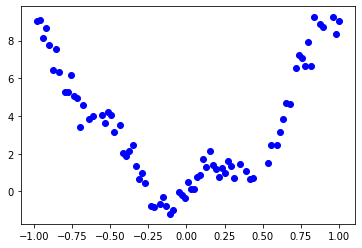

In [6]:
plt.scatter(train_x[:,1], train_y, c='b', label='Data')
plt.show()

In [7]:
def get_gradient(w, x, y):
    y_estimate = (np.power(x,2).dot(w)).flatten() #hypothesis
    error = (y.flatten() - y_estimate) 
    mse = (1.0/len(x))*np.sum(np.power(error, 2)) # mse
    gradient = -(1.0/len(x)) * error.dot(x**2)         # gradient
    return gradient, mse

In [8]:
w = np.random.randn(2)
alpha = 0.25
tolerance = 1e-3
print("Intial values of Weights:")
print(w[1], w[0])
# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
#     print(gradient)
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged")
        break
    
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
        print ("Updated Weights : {:f} , {:f}".format(w[1], w[0]))
    iterations += 1
    w = new_w

print ("Final Weights : {:f} , {:f}".format(w[1], w[0]))
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

Intial values of Weights:
0.9908275646320475 0.27355061888057075
Iteration: 10 - Error: 4.7157
Updated Weights : 3.267464 , 2.370054
Iteration: 20 - Error: 3.3489
Updated Weights : 4.538952 , 2.065851
Iteration: 30 - Error: 2.4717
Updated Weights : 5.529184 , 1.714454
Iteration: 40 - Error: 1.8981
Updated Weights : 6.328553 , 1.426324
Iteration: 50 - Error: 1.5229
Updated Weights : 6.974947 , 1.193166
Iteration: 60 - Error: 1.2775
Updated Weights : 7.497680 , 1.004606
Iteration: 70 - Error: 1.1171
Updated Weights : 7.920413 , 0.852119
Iteration: 80 - Error: 1.0121
Updated Weights : 8.262276 , 0.728802
Iteration: 90 - Error: 0.9435
Updated Weights : 8.538738 , 0.629077
Iteration: 100 - Error: 0.8986
Updated Weights : 8.762313 , 0.548430
Iteration: 110 - Error: 0.8693
Updated Weights : 8.943117 , 0.483210
Iteration: 120 - Error: 0.8501
Updated Weights : 9.089332 , 0.430468
Iteration: 130 - Error: 0.8375
Updated Weights : 9.207576 , 0.387815
Iteration: 140 - Error: 0.8293
Updated Weights 

In [9]:
print("Final eqn / hypothesis looks like:")
print('y = {:f}.x^2 + {:f}'.format(w[1], w[0]))

Final eqn / hypothesis looks like:
y = 9.672996.x^2 + 0.219929


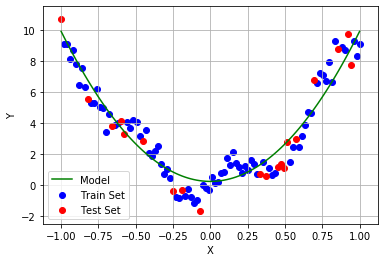

In [10]:
plt.plot(data_x[:,1], (data_x**2).dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()